In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [14]:
# Create Results Dataframe

In [15]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df

In [16]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,XGBoost,34.035521,28.083333,-1.968872
1,RandomForest,27.672188,21.250000,-0.962518
2,LSTM,25.565276,20.250000,-0.675049
3,LinearRegression,22.498148,17.500000,-0.297240


In [17]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'compare_models.png')

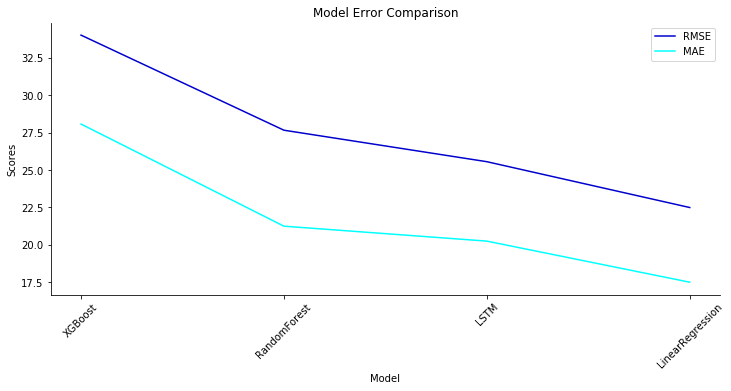

In [18]:
plot_results(results)